## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## Step 2: Create and Visualize Dataset

We'll create synthetic datasets with different shapes to demonstrate DBSCAN's capability.

Dataset Information:
Moons dataset: 300 samples, 2 features
Circles dataset: 300 samples, 2 features
Blobs dataset: 320 samples, 2 features


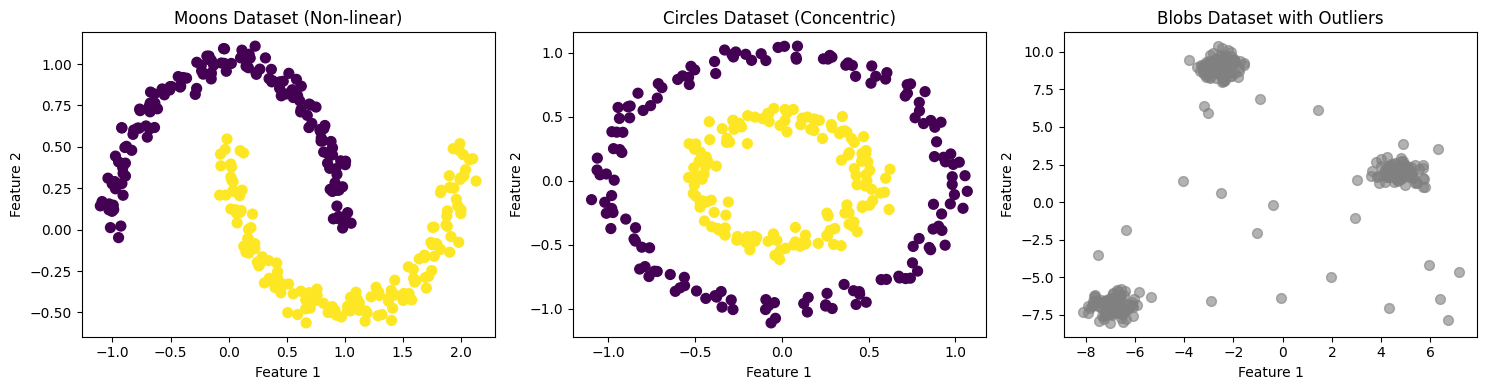

In [2]:
# Create different types of datasets
# 1. Moon-shaped data (non-linear)
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

# 2. Circular data (concentric circles)
X_circles, y_circles = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# 3. Blob data with outliers
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, n_features=2, 
                               cluster_std=0.5, random_state=42)

# Add some outliers to blob data
outliers = np.random.uniform(low=-8, high=8, size=(20, 2))
X_blobs = np.vstack([X_blobs, outliers])
y_blobs = np.hstack([y_blobs, np.full(20, -1)])  # -1 for outliers

# Display dataset information
print("Dataset Information:")
print("="*60)
print(f"Moons dataset: {X_moons.shape[0]} samples, {X_moons.shape[1]} features")
print(f"Circles dataset: {X_circles.shape[0]} samples, {X_circles.shape[1]} features")
print(f"Blobs dataset: {X_blobs.shape[0]} samples, {X_blobs.shape[1]} features")
print("="*60)

# Visualize datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', s=50)
axes[0].set_title('Moons Dataset (Non-linear)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis', s=50)
axes[1].set_title('Circles Dataset (Concentric)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

axes[2].scatter(X_blobs[:, 0], X_blobs[:, 1], c='gray', s=50, alpha=0.6)
axes[2].set_title('Blobs Dataset with Outliers')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## Step 3: Feature Scaling

DBSCAN uses distance, so scaling features is important for consistent results.

In [3]:
# Standardize features
scaler_moons = StandardScaler()
X_moons_scaled = scaler_moons.fit_transform(X_moons)

scaler_circles = StandardScaler()
X_circles_scaled = scaler_circles.fit_transform(X_circles)

scaler_blobs = StandardScaler()
X_blobs_scaled = scaler_blobs.fit_transform(X_blobs)

print("Feature Scaling Completed!")
print("="*60)
print("All datasets have been standardized (mean=0, std=1)")

Feature Scaling Completed!
All datasets have been standardized (mean=0, std=1)


## Step 4: Finding Optimal Epsilon (eps) using K-Distance Graph

The k-distance graph helps identify the optimal epsilon value.

K-Distance Graph for Moons Dataset:
Look for the 'elbow' point where the distance starts increasing rapidly.
This point suggests a good epsilon value.


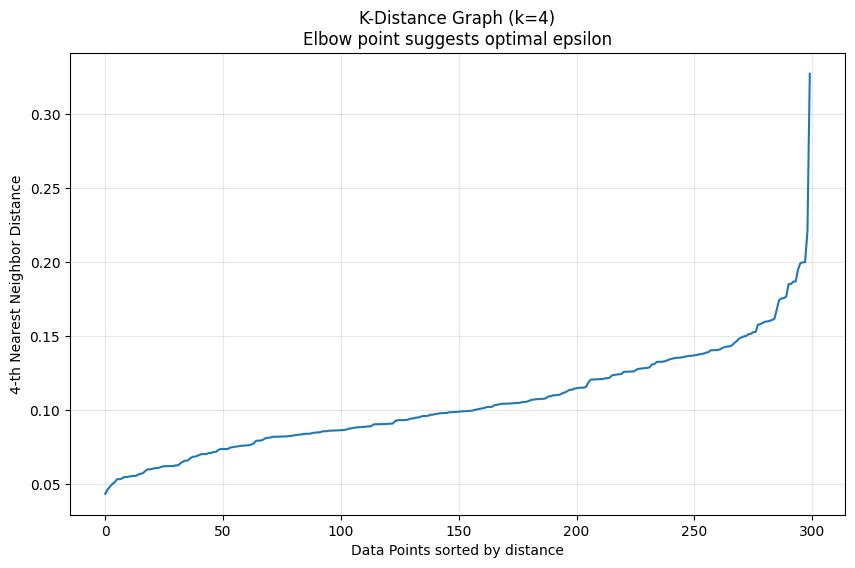


Suggested epsilon (90th percentile): 0.149


In [4]:
# Function to plot k-distance graph
def plot_k_distance(X, k=4):
    # Calculate k-nearest neighbors
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(X)
    distances, indices = neighbors.kneighbors(X)
    
    # Sort distances
    distances = np.sort(distances[:, k-1], axis=0)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance')
    plt.title(f'K-Distance Graph (k={k})\nElbow point suggests optimal epsilon')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return distances

# Plot k-distance graph for moons dataset
print("K-Distance Graph for Moons Dataset:")
print("="*60)
print("Look for the 'elbow' point where the distance starts increasing rapidly.")
print("This point suggests a good epsilon value.")
print("="*60)
distances_moons = plot_k_distance(X_moons_scaled, k=4)

# Suggest epsilon based on sorted distances
suggested_eps = np.percentile(distances_moons, 90)
print(f"\nSuggested epsilon (90th percentile): {suggested_eps:.3f}")

## Step 5: Train DBSCAN on Moons Dataset

DBSCAN Results (Moons Dataset):
Epsilon (eps): 0.3
Min samples: 5
Number of clusters found: 2
Number of noise points: 0
Cluster labels: {np.int64(0), np.int64(1)}


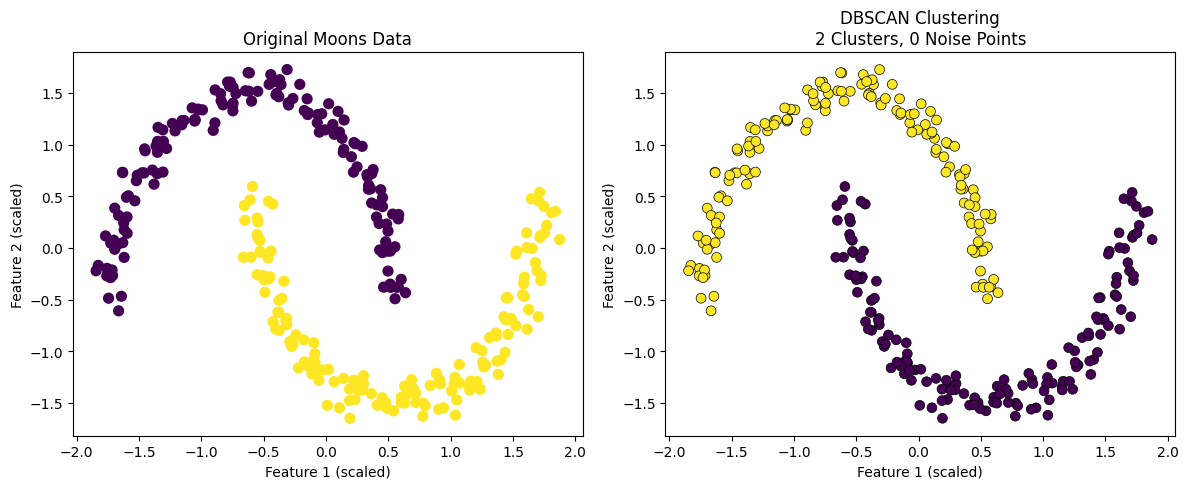

In [5]:
# Create DBSCAN model
dbscan_moons = DBSCAN(
    eps=0.3,              # Maximum distance between two points
    min_samples=5,        # Minimum points to form a dense region
    metric='euclidean'    # Distance metric
)

# Fit and predict
labels_moons = dbscan_moons.fit_predict(X_moons_scaled)

# Get number of clusters and noise points
n_clusters = len(set(labels_moons)) - (1 if -1 in labels_moons else 0)
n_noise = list(labels_moons).count(-1)

print("DBSCAN Results (Moons Dataset):")
print("="*60)
print(f"Epsilon (eps): {dbscan_moons.eps}")
print(f"Min samples: {dbscan_moons.min_samples}")
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Cluster labels: {set(labels_moons)}")
print("="*60)

# Visualize results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], c=y_moons, cmap='viridis', s=50)
plt.title('Original Moons Data')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

plt.subplot(1, 2, 2)
plt.scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], c=labels_moons, 
            cmap='viridis', s=50, edgecolors='black', linewidth=0.5)
plt.title(f'DBSCAN Clustering\n{n_clusters} Clusters, {n_noise} Noise Points')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()

## Step 6: DBSCAN on Circles Dataset

DBSCAN Results (Circles Dataset):
Number of clusters found: 3
Number of noise points: 0


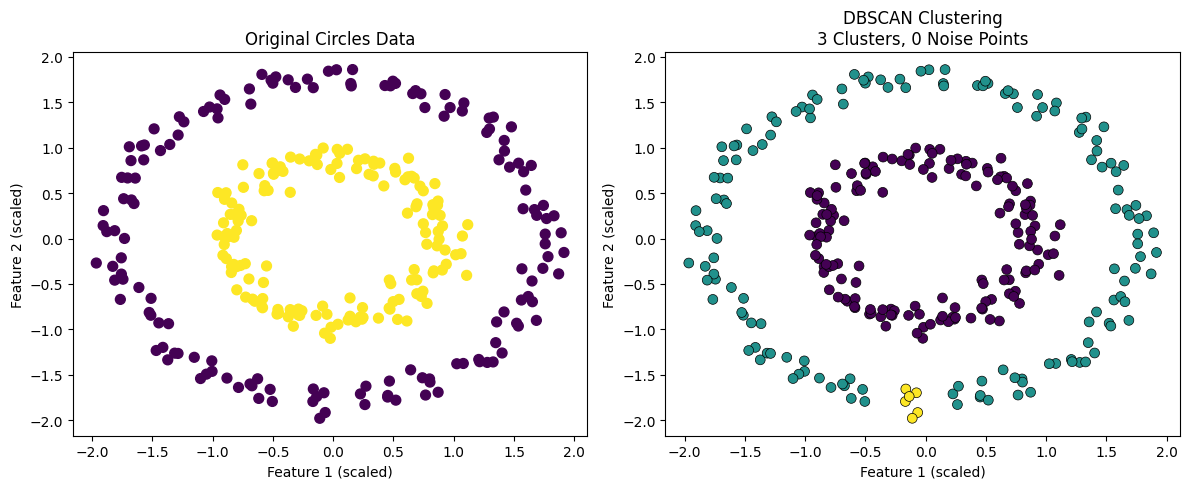

In [6]:
# Apply DBSCAN to circles dataset
dbscan_circles = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
labels_circles = dbscan_circles.fit_predict(X_circles_scaled)

# Results
n_clusters_circles = len(set(labels_circles)) - (1 if -1 in labels_circles else 0)
n_noise_circles = list(labels_circles).count(-1)

print("DBSCAN Results (Circles Dataset):")
print("="*60)
print(f"Number of clusters found: {n_clusters_circles}")
print(f"Number of noise points: {n_noise_circles}")
print("="*60)

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_circles_scaled[:, 0], X_circles_scaled[:, 1], c=y_circles, cmap='viridis', s=50)
plt.title('Original Circles Data')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

plt.subplot(1, 2, 2)
plt.scatter(X_circles_scaled[:, 0], X_circles_scaled[:, 1], c=labels_circles, 
            cmap='viridis', s=50, edgecolors='black', linewidth=0.5)
plt.title(f'DBSCAN Clustering\n{n_clusters_circles} Clusters, {n_noise_circles} Noise Points')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()

## Step 7: DBSCAN on Blobs with Outliers

Demonstrating DBSCAN's outlier detection capability.

DBSCAN Results (Blobs with Outliers):
Number of clusters found: 4
Number of noise points detected: 8
Actual outliers added: 20
Outlier detection accuracy: 40.0%


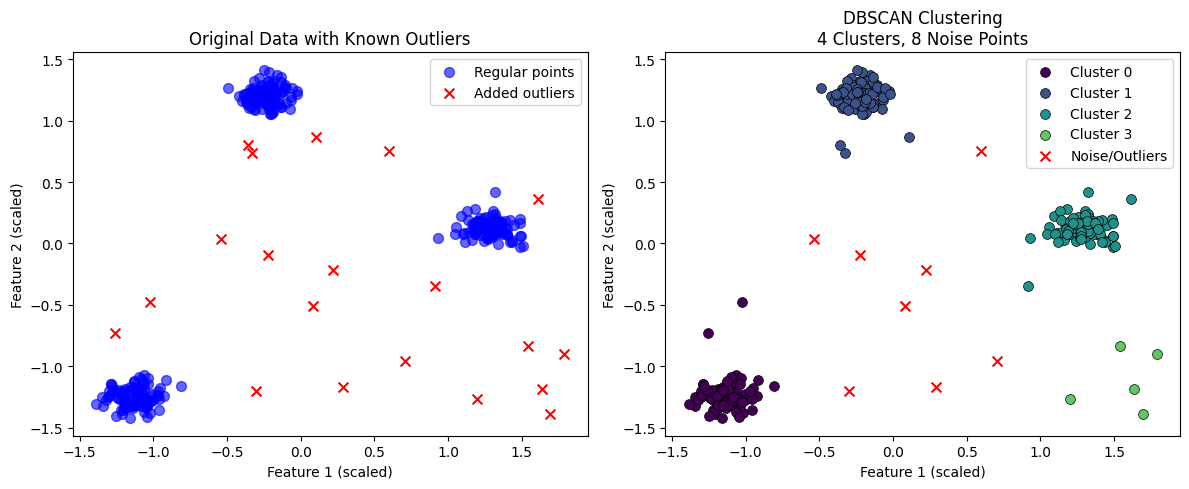

In [7]:
# Apply DBSCAN to blobs dataset
dbscan_blobs = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
labels_blobs = dbscan_blobs.fit_predict(X_blobs_scaled)

# Results
n_clusters_blobs = len(set(labels_blobs)) - (1 if -1 in labels_blobs else 0)
n_noise_blobs = list(labels_blobs).count(-1)

print("DBSCAN Results (Blobs with Outliers):")
print("="*60)
print(f"Number of clusters found: {n_clusters_blobs}")
print(f"Number of noise points detected: {n_noise_blobs}")
print(f"Actual outliers added: 20")
print(f"Outlier detection accuracy: {(n_noise_blobs/20)*100:.1f}%")
print("="*60)

# Visualize with noise points highlighted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_blobs_scaled[:300, 0], X_blobs_scaled[:300, 1], 
            c='blue', s=50, alpha=0.6, label='Regular points')
plt.scatter(X_blobs_scaled[300:, 0], X_blobs_scaled[300:, 1], 
            c='red', s=50, marker='x', label='Added outliers')
plt.title('Original Data with Known Outliers')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()

plt.subplot(1, 2, 2)
# Plot clusters
unique_labels = set(labels_blobs)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points
        mask = labels_blobs == label
        plt.scatter(X_blobs_scaled[mask, 0], X_blobs_scaled[mask, 1],
                   c='red', s=50, marker='x', label='Noise/Outliers', edgecolors='black')
    else:
        # Cluster points
        mask = labels_blobs == label
        plt.scatter(X_blobs_scaled[mask, 0], X_blobs_scaled[mask, 1],
                   c=[color], s=50, label=f'Cluster {label}', edgecolors='black', linewidth=0.5)

plt.title(f'DBSCAN Clustering\n{n_clusters_blobs} Clusters, {n_noise_blobs} Noise Points')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()

plt.tight_layout()
plt.show()

## Step 8: Effect of Epsilon (eps) Parameter

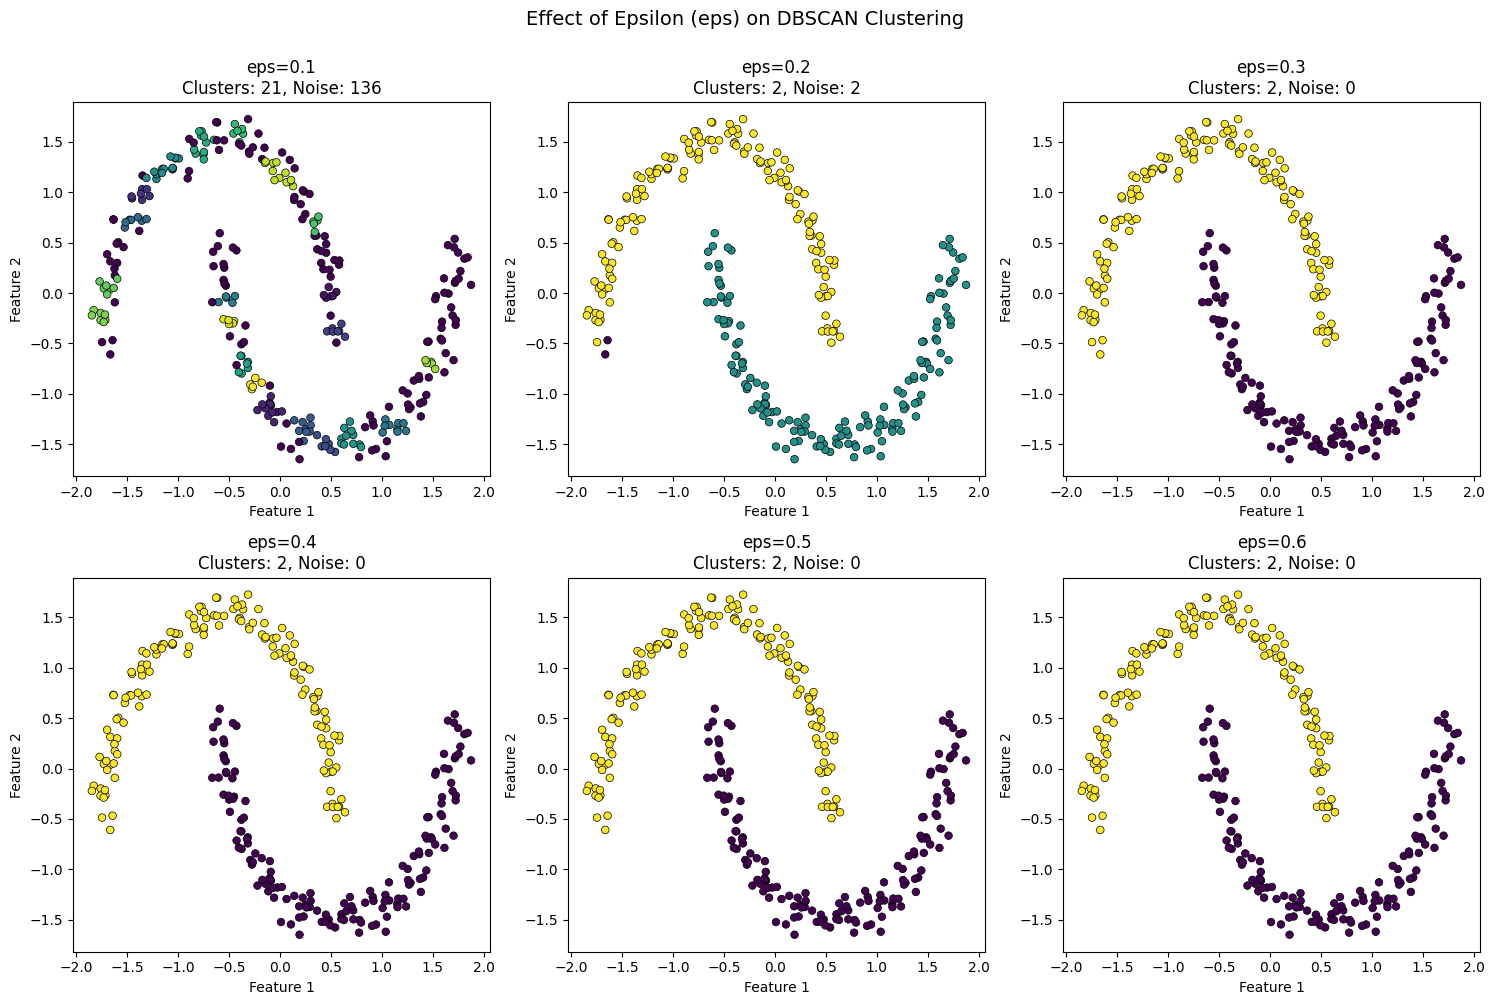


Epsilon Parameter Analysis:
 eps  n_clusters  n_noise
 0.1          21      136
 0.2           2        2
 0.3           2        0
 0.4           2        0
 0.5           2        0
 0.6           2        0

Observation:
- Small eps: More clusters, more noise points
- Large eps: Fewer clusters, points merge together
- Optimal eps: Balance between cluster separation and noise


In [8]:
# Test different epsilon values
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
results_eps = []

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, eps in enumerate(eps_values):
    dbscan_temp = DBSCAN(eps=eps, min_samples=5)
    labels_temp = dbscan_temp.fit_predict(X_moons_scaled)
    
    n_clusters_temp = len(set(labels_temp)) - (1 if -1 in labels_temp else 0)
    n_noise_temp = list(labels_temp).count(-1)
    
    results_eps.append({
        'eps': eps,
        'n_clusters': n_clusters_temp,
        'n_noise': n_noise_temp
    })
    
    # Plot
    axes[idx].scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], 
                     c=labels_temp, cmap='viridis', s=30, edgecolors='black', linewidth=0.5)
    axes[idx].set_title(f'eps={eps}\nClusters: {n_clusters_temp}, Noise: {n_noise_temp}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.suptitle('Effect of Epsilon (eps) on DBSCAN Clustering', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

# Summary
df_eps = pd.DataFrame(results_eps)
print("\nEpsilon Parameter Analysis:")
print("="*60)
print(df_eps.to_string(index=False))
print("\nObservation:")
print("- Small eps: More clusters, more noise points")
print("- Large eps: Fewer clusters, points merge together")
print("- Optimal eps: Balance between cluster separation and noise")
print("="*60)

## Step 9: Effect of MinPts (min_samples) Parameter

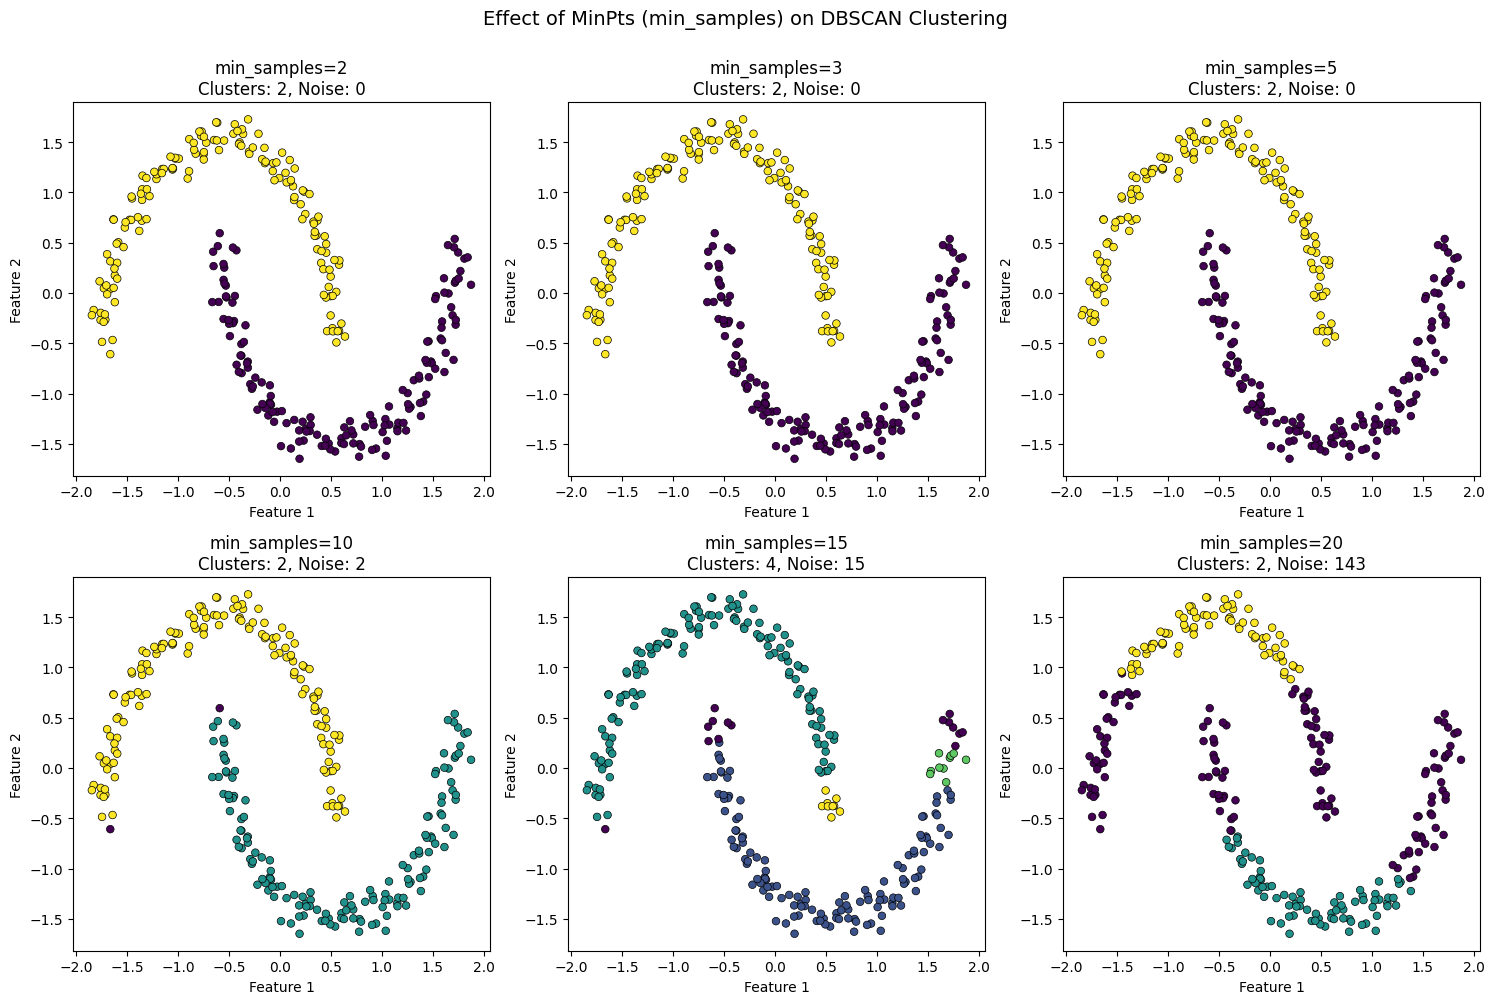


MinPts Parameter Analysis:
 min_samples  n_clusters  n_noise
           2           2        0
           3           2        0
           5           2        0
          10           2        2
          15           4       15
          20           2      143

Observation:
- Small min_samples: More sensitive, more clusters
- Large min_samples: Stricter density requirement, more noise
- Rule of thumb: min_samples ≥ dimensions + 1 (for 2D: ≥ 3)


In [9]:
# Test different min_samples values
min_samples_values = [2, 3, 5, 10, 15, 20]
results_minpts = []

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, min_pts in enumerate(min_samples_values):
    dbscan_temp = DBSCAN(eps=0.3, min_samples=min_pts)
    labels_temp = dbscan_temp.fit_predict(X_moons_scaled)
    
    n_clusters_temp = len(set(labels_temp)) - (1 if -1 in labels_temp else 0)
    n_noise_temp = list(labels_temp).count(-1)
    
    results_minpts.append({
        'min_samples': min_pts,
        'n_clusters': n_clusters_temp,
        'n_noise': n_noise_temp
    })
    
    # Plot
    axes[idx].scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], 
                     c=labels_temp, cmap='viridis', s=30, edgecolors='black', linewidth=0.5)
    axes[idx].set_title(f'min_samples={min_pts}\nClusters: {n_clusters_temp}, Noise: {n_noise_temp}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.suptitle('Effect of MinPts (min_samples) on DBSCAN Clustering', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

# Summary
df_minpts = pd.DataFrame(results_minpts)
print("\nMinPts Parameter Analysis:")
print("="*60)
print(df_minpts.to_string(index=False))
print("\nObservation:")
print("- Small min_samples: More sensitive, more clusters")
print("- Large min_samples: Stricter density requirement, more noise")
print("- Rule of thumb: min_samples ≥ dimensions + 1 (for 2D: ≥ 3)")
print("="*60)

## Step 10: Clustering Evaluation Metrics

Note: Silhouette score requires at least 2 clusters (excluding noise).

In [10]:
# Evaluate DBSCAN on different datasets
datasets = [
    ('Moons', X_moons_scaled, labels_moons),
    ('Circles', X_circles_scaled, labels_circles),
    ('Blobs', X_blobs_scaled, labels_blobs)
]

print("DBSCAN Clustering Evaluation:")
print("="*60)

for name, X_data, labels in datasets:
    # Filter out noise points for metrics
    mask = labels != -1
    X_filtered = X_data[mask]
    labels_filtered = labels[mask]
    
    n_clusters = len(set(labels_filtered))
    
    print(f"\n{name} Dataset:")
    print("-"*60)
    
    if n_clusters >= 2:
        silhouette = silhouette_score(X_filtered, labels_filtered)
        davies_bouldin = davies_bouldin_score(X_filtered, labels_filtered)
        calinski = calinski_harabasz_score(X_filtered, labels_filtered)
        
        print(f"  Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
        print(f"  Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
        print(f"  Calinski-Harabasz Score: {calinski:.4f} (higher is better)")
    else:
        print(f"  Cannot compute metrics: Only {n_clusters} cluster(s) found")
    
    print(f"  Number of clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")
    print(f"  Number of noise points: {list(labels).count(-1)}")

print("\n" + "="*60)
print("\nMetric Interpretations:")
print("-"*60)
print("Silhouette Score: Measures how similar points are within clusters")
print("  - Range: -1 (worst) to 1 (best)")
print("  - Close to 1: Dense, well-separated clusters")
print("\nDavies-Bouldin Index: Ratio of within-cluster to between-cluster distances")
print("  - Lower is better (0 is ideal)")
print("\nCalinski-Harabasz Score: Ratio of between-cluster to within-cluster variance")
print("  - Higher is better")
print("="*60)

DBSCAN Clustering Evaluation:

Moons Dataset:
------------------------------------------------------------
  Silhouette Score: 0.3860 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 1.0211 (lower is better)
  Calinski-Harabasz Score: 259.6199 (higher is better)
  Number of clusters: 2
  Number of noise points: 0

Circles Dataset:
------------------------------------------------------------
  Silhouette Score: 0.0042 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 24.3343 (lower is better)
  Calinski-Harabasz Score: 5.2010 (higher is better)
  Number of clusters: 3
  Number of noise points: 0

Blobs Dataset:
------------------------------------------------------------
  Silhouette Score: 0.8965 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.2268 (lower is better)
  Calinski-Harabasz Score: 8877.5344 (higher is better)
  Number of clusters: 4
  Number of noise points: 8


Metric Interpretations:
---------------------------------------------------------

## Key Parameters and Best Practices

### Key Parameters in DBSCAN:

**eps (epsilon)**:
- Maximum distance between two points to be considered neighbors
- Most critical parameter
- Too small: Many small clusters and noise
- Too large: All points merge into one cluster
- **Selection methods**:
  - K-distance graph (look for "elbow")
  - Domain knowledge
  - Trial and error with visualization

**min_samples (MinPts)**:
- Minimum number of points to form a dense region
- Affects noise detection sensitivity
- Too small: More clusters, sensitive to noise
- Too large: Fewer clusters, more noise points
- **Rule of thumb**: 
  - min_samples ≥ dimensions + 1
  - For 2D data: min_samples ≥ 3
  - For noisy data: Use higher values (e.g., 5-10)

**metric**:
- Distance metric to use
- Default: 'euclidean'
- Options: 'manhattan', 'chebyshev', 'minkowski', etc.
- Choose based on data characteristics

**algorithm**:
- Algorithm to compute nearest neighbors
- Options: 'auto', 'ball_tree', 'kd_tree', 'brute'
- 'auto' chooses the best based on data

### Best Practices:

1. **Always Scale Features**: 
   - DBSCAN is distance-based
   - Use StandardScaler or MinMaxScaler

2. **Use K-Distance Graph**:
   - Plot k-nearest neighbor distances
   - Look for elbow point
   - Set k = min_samples

3. **Start with Default min_samples**:
   - For 2D: min_samples = 4 or 5
   - Increase for noisy data
   - Decrease for sparse data

4. **Visualize Results**:
   - Always plot clusters
   - Identify noise points
   - Verify cluster shapes make sense

5. **Handle High Dimensions**:
   - Consider dimensionality reduction (PCA, t-SNE)
   - Use domain-specific distance metrics
   - Be aware of curse of dimensionality

6. **Noise Point Analysis**:
   - Noise points (label = -1) are potential outliers
   - Useful for anomaly detection
   - Review if too many/few noise points

### Parameter Selection Guidelines:

**For Different Data Types:**

| Data Type | eps | min_samples | Notes |
|-----------|-----|-------------|-------|
| Dense, uniform | Small | 5-10 | Clear cluster boundaries |
| Sparse | Large | 3-5 | Avoid too much noise |
| Noisy | Medium | 10-20 | Higher threshold for core points |
| High-dimensional | Varies | 2*dims | Consider dimensionality reduction |

### When to Use DBSCAN:

✅ **Good for:**
- Unknown number of clusters
- Arbitrary cluster shapes (non-spherical)
- Outlier detection needed
- Varying cluster sizes
- Spatial/geographic data
- Noisy data

❌ **Not ideal for:**
- Clusters with varying densities
- Very high-dimensional data
- When all points must be assigned to clusters
- Spherical, equal-sized clusters (use K-Means)
- When cluster count is known and important

## Conclusion:

DBSCAN is a powerful density-based clustering algorithm that:
- Automatically determines the number of clusters
- Discovers clusters of arbitrary shapes
- Effectively identifies outliers and noise
- Requires only two main parameters (eps, min_samples)
- Works well with spatial and geographic data
- Does not require initialization (deterministic)

**Key Insight**: DBSCAN's strength lies in its ability to find clusters based on density, making it ideal for real-world data where clusters may have irregular shapes and outliers are present. The key to success is finding the right balance between eps and min_samples through visualization and the k-distance graph!